## import necessary libraries


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.python.keras import regularizers 
from tensorflow.keras.optimizers import SGD

## Load the dataset

In [2]:
# Load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# The class names for the mnist dataset are predefined and can be found in the official documentation
class_names = [0,1,2,3,4,5,6,7,8,9]

In [4]:
# to find the shape or splt ratio
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


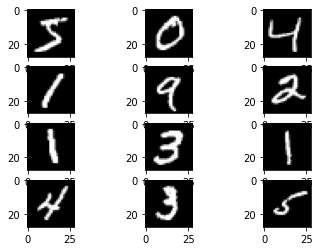

In [5]:
# Plot the first 12 images from the training set
fig, axes = pyplot.subplots(nrows=4, ncols=3)
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()


In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

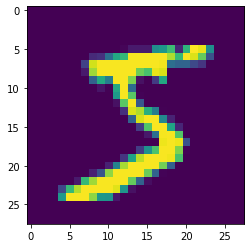

In [7]:
# show figure in index o
plt.imshow(x_train[0])

##  Preprocess the data

In [8]:
''' The pixel values is from 0 to 255, normalize pixel values to range 0-1 by dividing with 255. '''

# Convert from integers to 
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
x_train[0] #now we can see all values are in range of 0-1 for 1st photograph

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
#reshape dataset to have four rank
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [11]:
# to find the shape or splt ratio
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


In [12]:
# Add new dimension using data augmentation parameters for training set
train_datagen = ImageDataGenerator(
 rotation_range=20, # Randomly rotate image by 20 degrees
 width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
 height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
 horizontal_flip=True, # Randomly flip images horizontally
 vertical_flip=False, # Don't randomly flip images vertically
 shear_range=0.10, # crops part of the image
 zoom_range=0.10 # #zooms the image by 10%
)

In [13]:
# Fit the transformation to the training dataset
train_datagen.fit(x_train)

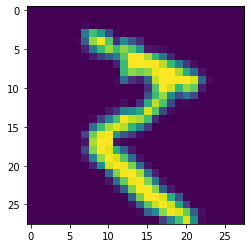

In [14]:
# show one of the transformed data
plt.imshow(train_datagen.random_transform(x_train[0]))

### create a model without any regularization method

In [15]:
# Creating sequential without any regularization method

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [16]:
# No regularizer was used for this model
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 67s 35ms/step - loss: 0.5132 - accuracy: 0.8284 - val_loss: 0.1646 - val_accuracy: 0.9484
Epoch 2/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1608 - accuracy: 0.9495 - val_loss: 0.0808 - val_accuracy: 0.9725
Epoch 3/15
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1224 - accuracy: 0.9608 - val_loss: 0.0531 - val_accuracy: 0.9830
Epoch 4/15
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1084 - accuracy: 0.9658 - val_loss: 0.0505 - val_accuracy: 0.9851
Epoch 5/15
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0959 - accuracy: 0.9698 - val_loss: 0.0535 - val_accuracy: 0.9828
Epoch 6/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0906 - accuracy: 0.9711 - val_loss: 0.0488 - val_accuracy: 0.9850
Epoch 7/15
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0813 - accuracy: 0.9747 - val_loss: 0.0615 -

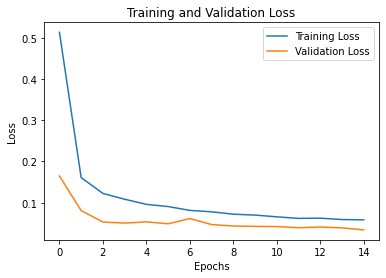

In [17]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

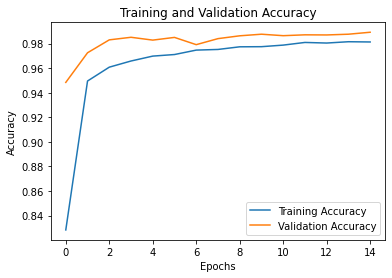

In [18]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [19]:
# Predict the classes of the test set
#np.argmax(model.predict(x_test), axis=-1), 
#this means that the argmax operation will be applied to the output predictions of the model along the l
#this is the class probabilities for each test instance.
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)


313/313 [==============================] - 3s 9ms/step


In [20]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

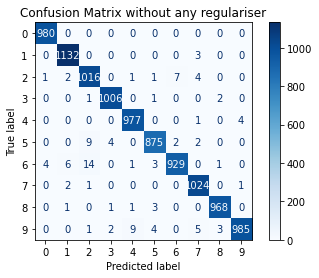

In [21]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix without any regulariser')
plt.show()

### How did the use of different regularisation methods affect the performance of your CNN model?

##### Build the constructors using considering L1 Regularization

In [22]:
# l1 Regularization
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.001)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(units=10, activation='softmax', kernel_regularizer=regularizers.l1(0.001)))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

### Compile the modeL using SGD as optimizer

In [23]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


### Training and evaluation of model

In [24]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 73s 38ms/step - loss: 2.1886 - accuracy: 0.7640 - val_loss: 0.7087 - val_accuracy: 0.9298
Epoch 2/15
1875/1875 [==============================] - 97s 52ms/step - loss: 0.8524 - accuracy: 0.8709 - val_loss: 0.7740 - val_accuracy: 0.8893
Epoch 3/15
1875/1875 [==============================] - 95s 51ms/step - loss: 0.7738 - accuracy: 0.8845 - val_loss: 0.6431 - val_accuracy: 0.9209
Epoch 4/15
1875/1875 [==============================] - 88s 47ms/step - loss: 0.7290 - accuracy: 0.8940 - val_loss: 0.5709 - val_accuracy: 0.9430
Epoch 5/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.7033 - accuracy: 0.8983 - val_loss: 0.5422 - val_accuracy: 0.9477
Epoch 6/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.6834 - accuracy: 0.9021 - val_loss: 0.5190 - val_accuracy: 0.9510
Epoch 7/15
1875/1875 [==============================] - 85s 45ms/step - loss: 0.6717 - accuracy: 0.9040 - val_loss: 0.5791 -

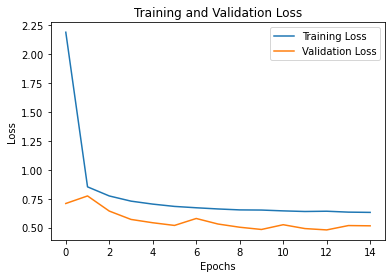

In [25]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

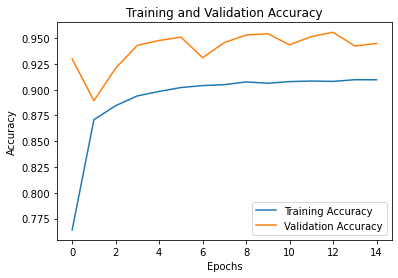

In [26]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [27]:
# Predict the classes of the test set
#np.argmax(model.predict(x_test), axis=-1), 
#this means that the argmax operation will be applied to the output predictions of the model along the l
#this is the class probabilities for each test instance.
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)


313/313 [==============================] - 4s 12ms/step


In [28]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.93      0.94      1032
           3       0.97      0.96      0.97      1010
           4       0.93      0.98      0.96       982
           5       0.81      0.98      0.89       892
           6       0.97      0.93      0.95       958
           7       0.94      0.97      0.96      1028
           8       0.98      0.83      0.90       974
           9       0.98      0.87      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000



<Figure size 2000x3000 with 0 Axes>

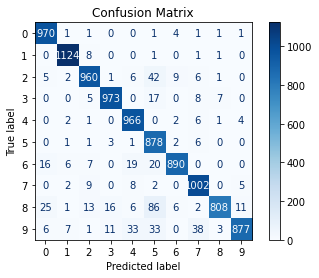

In [29]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of L1')
plt.show()

#### Add dropout to the L1 regularizer

In [30]:
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax', kernel_regularizer=regularizers.l1(0.001)))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [31]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 84s 44ms/step - loss: 1.7324 - accuracy: 0.7340 - val_loss: 0.5997 - val_accuracy: 0.9385
Epoch 2/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.7896 - accuracy: 0.8749 - val_loss: 0.4690 - val_accuracy: 0.9681
Epoch 3/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.6830 - accuracy: 0.9002 - val_loss: 0.4281 - val_accuracy: 0.9696
Epoch 4/15
1875/1875 [==============================] - 68s 36ms/step - loss: 0.6317 - accuracy: 0.9115 - val_loss: 0.4113 - val_accuracy: 0.9722
Epoch 5/15
1875/1875 [==============================] - 69s 37ms/step - loss: 0.5919 - accuracy: 0.9190 - val_loss: 0.3982 - val_accuracy: 0.9727
Epoch 6/15
1875/1875 [==============================] - 76s 40ms/step - loss: 0.5747 - accuracy: 0.9223 - val_loss: 0.3928 - val_accuracy: 0.9723
Epoch 7/15
1875/1875 [==============================] - 75s 40ms/step - loss: 0.5462 - accuracy: 0.9281 - val_loss: 0.3952 -

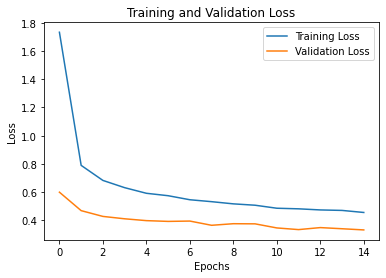

In [33]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

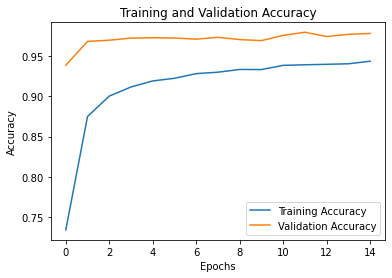

In [34]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [35]:
# Predict the classes of the test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 4s 13ms/step


In [36]:
from sklearn.metrics import classification_report
# Print the classification report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.95      0.99      0.97       892
           6       0.98      0.97      0.97       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

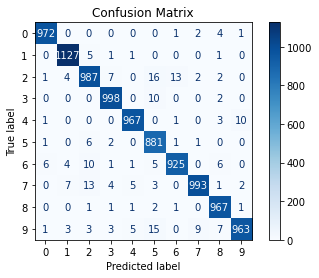

In [37]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix L1 with 50% Dropout')
plt.show()

### Change to L2 regularization

In [38]:
#### L2 without dropout

In [39]:
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(units=10, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 128)       

In [40]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [41]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 76s 39ms/step - loss: 0.7125 - accuracy: 0.8246 - val_loss: 0.2794 - val_accuracy: 0.9596
Epoch 2/15
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3031 - accuracy: 0.9441 - val_loss: 0.1908 - val_accuracy: 0.9717
Epoch 3/15
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2293 - accuracy: 0.9564 - val_loss: 0.1446 - val_accuracy: 0.9783
Epoch 4/15
1875/1875 [==============================] - 72s 39ms/step - loss: 0.1929 - accuracy: 0.9614 - val_loss: 0.1171 - val_accuracy: 0.9837
Epoch 5/15
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1723 - accuracy: 0.9651 - val_loss: 0.1097 - val_accuracy: 0.9828
Epoch 6/15
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1599 - accuracy: 0.9667 - val_loss: 0.1249 - val_accuracy: 0.9775
Epoch 7/15
1875/1875 [==============================] - 779s 416ms/step - loss: 0.1522 - accuracy: 0.9683 - val_loss: 0.0993

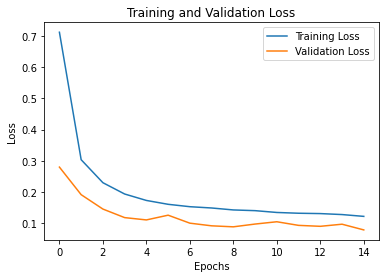

In [42]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

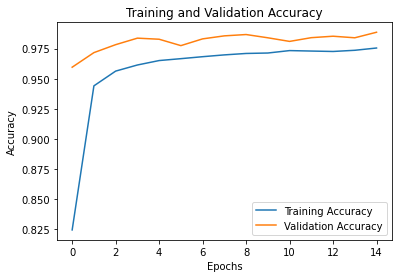

In [43]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [44]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 5s 14ms/step


In [45]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.96      0.99      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

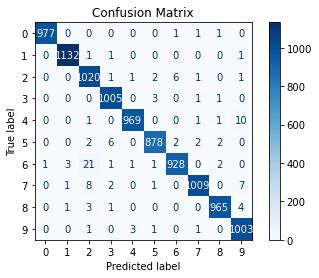

In [46]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix L2')
plt.show()

#### L2 regularization with dropout

In [47]:
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 128)       

In [48]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 87s 46ms/step - loss: 0.9108 - accuracy: 0.7584 - val_loss: 0.2922 - val_accuracy: 0.9586
Epoch 2/15
1875/1875 [==============================] - 87s 46ms/step - loss: 0.4209 - accuracy: 0.9142 - val_loss: 0.2092 - val_accuracy: 0.9720
Epoch 3/15
1875/1875 [==============================] - 87s 47ms/step - loss: 0.3167 - accuracy: 0.9365 - val_loss: 0.1537 - val_accuracy: 0.9810
Epoch 4/15
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2676 - accuracy: 0.9464 - val_loss: 0.1558 - val_accuracy: 0.9767
Epoch 5/15
1875/1875 [==============================] - 93s 50ms/step - loss: 0.2434 - accuracy: 0.9512 - val_loss: 0.1383 - val_accuracy: 0.9803
Epoch 6/15
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2252 - accuracy: 0.9552 - val_loss: 0.1267 - val_accuracy: 0.9831
Epoch 7/15
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2104 - accuracy: 0.9581 - val_loss: 0.1296 

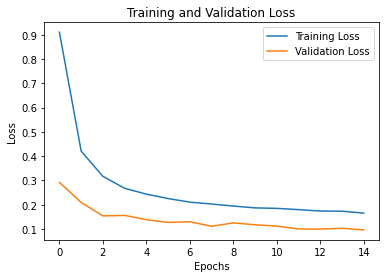

In [50]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

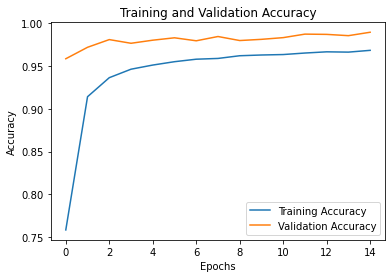

In [51]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [52]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 10ms/step


In [53]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.98      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### CONFUSION MATRIX FOR L2 REGULARIZTION WITH DROPOUT OF 50%

<Figure size 2000x3000 with 0 Axes>

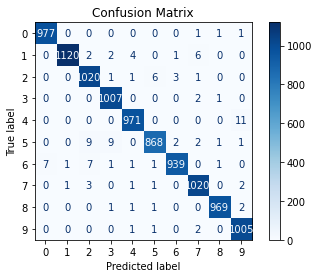

In [54]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix L2 With 50% Dropout')
plt.show()

### Use dropout

### Use dropout of 40%

In [55]:
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=10, activation='softmax'))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 128)       

In [56]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [57]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.6290 - accuracy: 0.7897 - val_loss: 0.0898 - val_accuracy: 0.9695
Epoch 2/15
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2365 - accuracy: 0.9281 - val_loss: 0.0777 - val_accuracy: 0.9750
Epoch 3/15
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1782 - accuracy: 0.9460 - val_loss: 0.0480 - val_accuracy: 0.9843
Epoch 4/15
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1508 - accuracy: 0.9533 - val_loss: 0.0771 - val_accuracy: 0.9770
Epoch 5/15
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1339 - accuracy: 0.9599 - val_loss: 0.0553 - val_accuracy: 0.9816
Epoch 6/15
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1250 - accuracy: 0.9616 - val_loss: 0.0501 - val_accuracy: 0.9835
Epoch 7/15
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1177 - accuracy: 0.9643 - val_loss: 0.0401 -

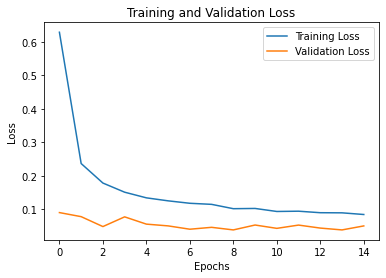

In [58]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

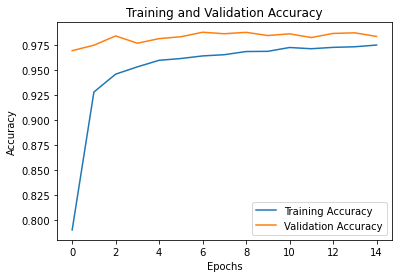

In [59]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [60]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 8ms/step


In [61]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.95      0.97      0.96      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.97      0.96      0.96       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

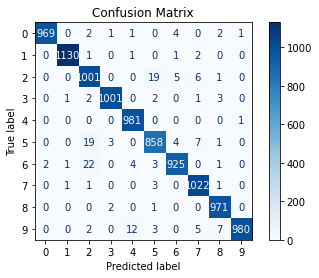

In [62]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix With Dropout 40%')
plt.show()

### Dropout 0.4 with L2 

In [63]:
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(units=10, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 2, 2, 128)       

In [64]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [65]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 76s 40ms/step - loss: 0.8618 - accuracy: 0.7759 - val_loss: 0.2640 - val_accuracy: 0.9648
Epoch 2/15
1875/1875 [==============================] - 67s 35ms/step - loss: 0.3851 - accuracy: 0.9239 - val_loss: 0.1953 - val_accuracy: 0.9751
Epoch 3/15
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2909 - accuracy: 0.9431 - val_loss: 0.1597 - val_accuracy: 0.9778
Epoch 4/15
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2432 - accuracy: 0.9507 - val_loss: 0.1444 - val_accuracy: 0.9794
Epoch 5/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2179 - accuracy: 0.9551 - val_loss: 0.1297 - val_accuracy: 0.9798
Epoch 6/15
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2000 - accuracy: 0.9598 - val_loss: 0.1141 - val_accuracy: 0.9839
Epoch 7/15
1875/1875 [==============================] - 91s 49ms/step - loss: 0.1939 - accuracy: 0.9604 - val_loss: 0.1236 -

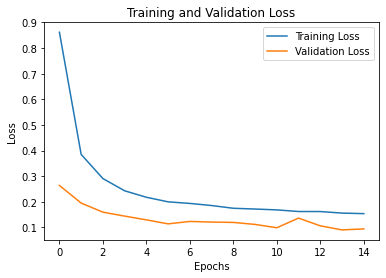

In [66]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

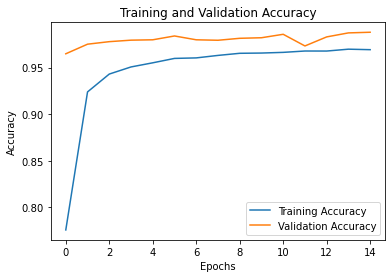

In [67]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [68]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 8ms/step


In [69]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

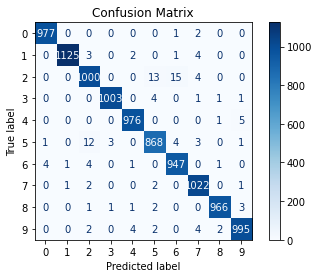

In [70]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix With L2 & Dropout')
plt.show()

### Earlystopping regularization

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model with SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping callback
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9120 - val_loss: 0.1733 - val_accuracy: 0.9512
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1450 - accuracy: 0.9581 - val_loss: 0.1219 - val_accuracy: 0.9630
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1036 - accuracy: 0.9702 - val_loss: 0.0993 - val_accuracy: 0.9694
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0815 - accuracy: 0.9761 - val_loss: 0.0913 - val_accuracy: 0.9721
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0663 - accuracy: 0.9802 - val_loss: 0.0886 - val_accuracy: 0.9729
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0566 - accuracy: 0.9834 - val_loss: 0.0758 - val_accuracy: 0.9762
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0478 - accuracy: 0.9860 - val_loss: 0.0777 - val_accuracy

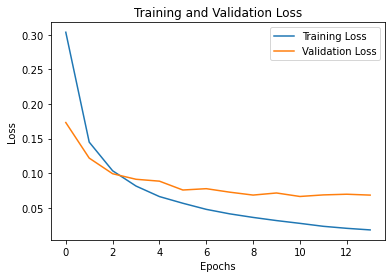

In [72]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

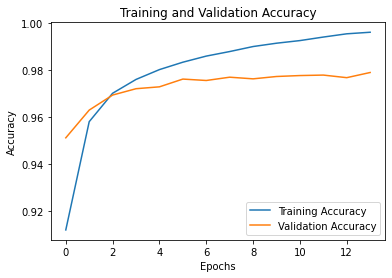

In [73]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [74]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 4ms/step


In [75]:
from sklearn.metrics import classification_report

y_test_labels = np.argmax(y_test, axis=1) # convert y_test to 1D array
y_pred_labels = np.argmax(model.predict(x_test), axis=1) # convert y_pred to 1D array
cm = confusion_matrix(y_test_labels, y_pred_labels)

print(classification_report(y_test_labels, y_pred_labels))


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

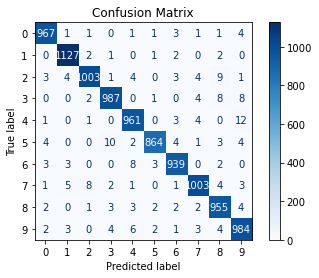

In [76]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Earlystopping')
plt.show()

### 3B b) Report how changes to the number of convolution blocks affect the performance of your model quantitatively?

In [77]:
# Load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# The class names for the mnist dataset are predefined and can be found in the official documentation
class_names = [0,1,2,3,4,5,6,7,8,9]

''' The pixel values is from 0 to 255, normalize pixel values to range 0-1 by dividing with 255. '''

# Convert from integers to 
x_train = x_train / 255.0
x_test = x_test / 255.0

#reshape dataset to have four rank
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Add new dimension using data augmentation parameters for training set
train_datagen = ImageDataGenerator(
 rotation_range=20, # Randomly rotate image by 20 degrees
 width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
 height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
 horizontal_flip=True, # Randomly flip images horizontally
 vertical_flip=False, # Don't randomly flip images vertically
 shear_range=0.10, # crops part of the image
 zoom_range=0.10 # #zooms the image by 10%
)

# Fit the transformation to the training dataset
train_datagen.fit(x_train)

### Two convolution block

In [78]:
# Creating sequential of two convolutional blocks

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 2304)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [79]:

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 77s 40ms/step - loss: 1.1037 - accuracy: 0.7087 - val_loss: 0.3636 - val_accuracy: 0.9580
Epoch 2/15
1875/1875 [==============================] - 68s 36ms/step - loss: 0.6353 - accuracy: 0.8652 - val_loss: 0.2902 - val_accuracy: 0.9682
Epoch 3/15
1875/1875 [==============================] - 75s 40ms/step - loss: 0.5063 - accuracy: 0.8968 - val_loss: 0.2564 - val_accuracy: 0.9703
Epoch 4/15
1875/1875 [==============================] - 72s 38ms/step - loss: 0.4471 - accuracy: 0.9106 - val_loss: 0.2202 - val_accuracy: 0.9784
Epoch 5/15
1875/1875 [==============================] - 69s 37ms/step - loss: 0.4064 - accuracy: 0.9215 - val_loss: 0.2136 - val_accuracy: 0.9755
Epoch 6/15
1875/1875 [==============================] - 68s 37ms/step - loss: 0.3745 - accuracy: 0.9291 - val_loss: 0.2036 - val_accuracy: 0.9808
Epoch 7/15
1875/1875 [==============================] - 71s 38ms/step - loss: 0.3546 - accuracy: 0.9334 - val_loss: 0.2013 -

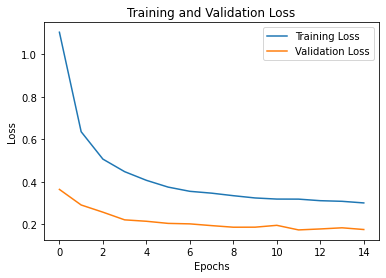

In [80]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

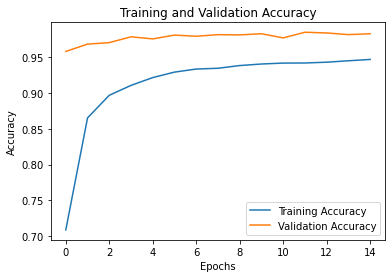

In [81]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [82]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 10ms/step


In [83]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.95      0.97      0.96       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

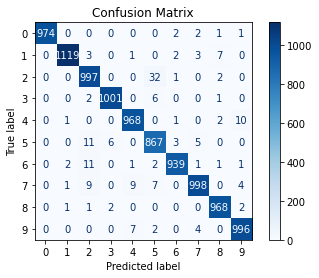

In [84]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix 2 convolutional block')
plt.show()

###  three convolutional block with 0.3 dropout

##### I already done three convolutional block with 0.4 dropout

In [85]:
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 2, 2, 128)       

In [86]:

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.6259 - accuracy: 0.7899 - val_loss: 0.1187 - val_accuracy: 0.9619
Epoch 2/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2222 - accuracy: 0.9312 - val_loss: 0.0703 - val_accuracy: 0.9777
Epoch 3/15
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1691 - accuracy: 0.9480 - val_loss: 0.0569 - val_accuracy: 0.9828
Epoch 4/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1442 - accuracy: 0.9560 - val_loss: 0.0594 - val_accuracy: 0.9804
Epoch 5/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1263 - accuracy: 0.9611 - val_loss: 0.0645 - val_accuracy: 0.9797
Epoch 6/15
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1149 - accuracy: 0.9643 - val_loss: 0.0465 - val_accuracy: 0.9842
Epoch 7/15
1875/1875 [==============================] - 72s 39ms/step - loss: 0.1084 - accuracy: 0.9664 - val_loss: 0.0524 -

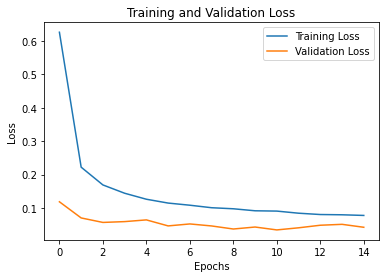

In [87]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

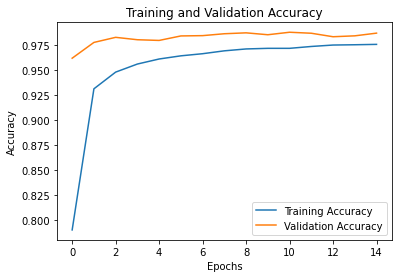

In [88]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [89]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 9ms/step


In [90]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.96      0.97      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.96      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

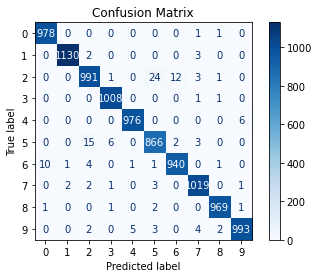

In [91]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix 3 Blocks & 30% dropout')
plt.show()

### Try three convolutional blocks with 0.5 dropout

In [92]:
# Creating sequential

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 2, 2, 128)      

In [93]:
# model compile

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 59s 31ms/step - loss: 0.7286 - accuracy: 0.7532 - val_loss: 0.1227 - val_accuracy: 0.9623
Epoch 2/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2675 - accuracy: 0.9176 - val_loss: 0.0931 - val_accuracy: 0.9688
Epoch 3/15
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2004 - accuracy: 0.9392 - val_loss: 0.0596 - val_accuracy: 0.9791
Epoch 4/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1714 - accuracy: 0.9488 - val_loss: 0.0606 - val_accuracy: 0.9815
Epoch 5/15
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1503 - accuracy: 0.9544 - val_loss: 0.0375 - val_accuracy: 0.9862
Epoch 6/15
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1408 - accuracy: 0.9588 - val_loss: 0.0476 - val_accuracy: 0.9856
Epoch 7/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1280 - accuracy: 0.9617 - val_loss: 0.0672 -

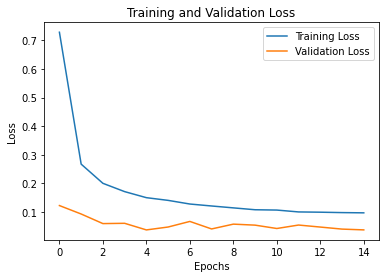

In [94]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

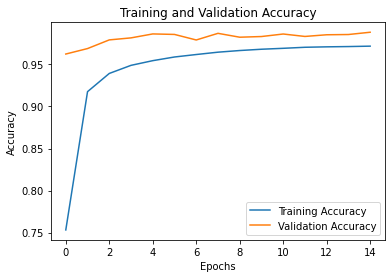

In [95]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [96]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 8ms/step


In [97]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.97      0.97      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

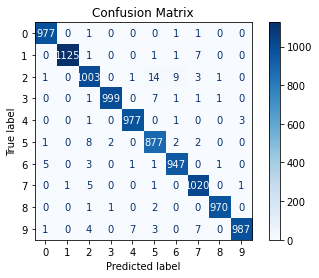

In [98]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix 3 Blocks & 50% Dropout')
plt.show()

#### Four convolutional block

In [99]:

# Creating sequential model
model = Sequential()

# Add four convolutional blocks
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 3, 3, 128)      

In [100]:
# model compile

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 123s 65ms/step - loss: 0.6925 - accuracy: 0.7677 - val_loss: 0.1178 - val_accuracy: 0.9614
Epoch 2/15
1875/1875 [==============================] - 119s 64ms/step - loss: 0.2146 - accuracy: 0.9360 - val_loss: 0.0848 - val_accuracy: 0.9731
Epoch 3/15
1875/1875 [==============================] - 126s 67ms/step - loss: 0.1567 - accuracy: 0.9532 - val_loss: 0.0671 - val_accuracy: 0.9789
Epoch 4/15
1875/1875 [==============================] - 132s 70ms/step - loss: 0.1279 - accuracy: 0.9619 - val_loss: 0.0761 - val_accuracy: 0.9754
Epoch 5/15
1875/1875 [==============================] - 141s 75ms/step - loss: 0.1130 - accuracy: 0.9665 - val_loss: 0.0541 - val_accuracy: 0.9827
Epoch 6/15
1875/1875 [==============================] - 128s 68ms/step - loss: 0.1067 - accuracy: 0.9690 - val_loss: 0.0505 - val_accuracy: 0.9841
Epoch 7/15
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0943 - accuracy: 0.9721 - val_loss: 0

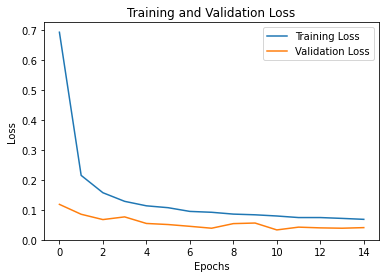

In [101]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

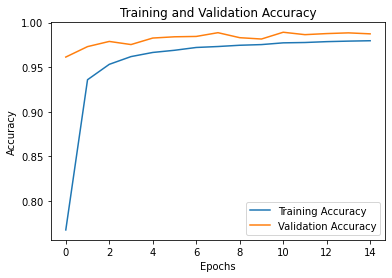

In [102]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [103]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 4s 12ms/step


In [104]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.97      0.98      0.97      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

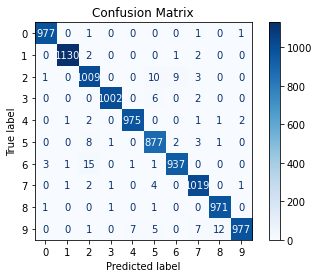

In [105]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix 4 blocks and 50% dropout')
plt.show()

### Five convolutional blocks

In [106]:
# Creating sequential model
model = Sequential()

# Add five convolutional blocks
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 3, 3, 128)      

In [107]:
# model compile

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 124s 66ms/step - loss: 0.7095 - accuracy: 0.7604 - val_loss: 0.0967 - val_accuracy: 0.9704
Epoch 2/15
1875/1875 [==============================] - 146s 78ms/step - loss: 0.2141 - accuracy: 0.9378 - val_loss: 0.0930 - val_accuracy: 0.9717
Epoch 3/15
1875/1875 [==============================] - 137s 73ms/step - loss: 0.1585 - accuracy: 0.9546 - val_loss: 0.0641 - val_accuracy: 0.9799
Epoch 4/15
1875/1875 [==============================] - 136s 72ms/step - loss: 0.1307 - accuracy: 0.9612 - val_loss: 0.0576 - val_accuracy: 0.9817
Epoch 5/15
1875/1875 [==============================] - 137s 73ms/step - loss: 0.1176 - accuracy: 0.9662 - val_loss: 0.0721 - val_accuracy: 0.9770
Epoch 6/15
1875/1875 [==============================] - 134s 72ms/step - loss: 0.1063 - accuracy: 0.9694 - val_loss: 0.0541 - val_accuracy: 0.9828
Epoch 7/15
1875/1875 [==============================] - 140s 74ms/step - loss: 0.0976 - accuracy: 0.9709 - val_loss: 0

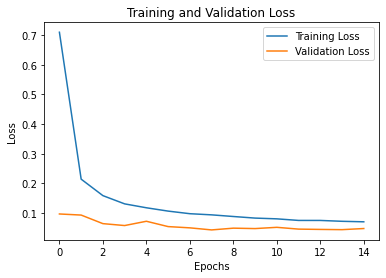

In [108]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

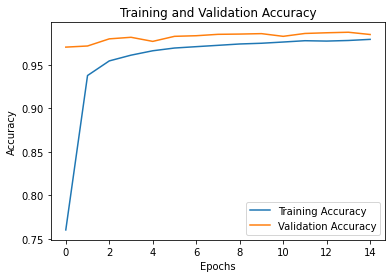

In [109]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [110]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 5s 15ms/step


In [111]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

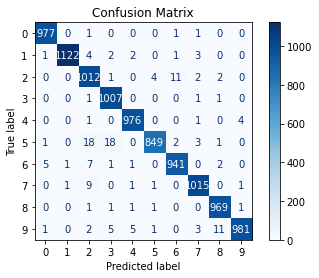

In [112]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix 5 Blocks & 50% dropout')
plt.show()

### c) What is the effect of varying learning rates on the performance of the CNN algorithm.

In [113]:
#### try learning rate from  0.1 and 0.0001.

#### learning rate of 0.001

In [114]:
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 2, 2, 128)      

In [115]:
# model compile with learning rate 0.001

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 71s 37ms/step - loss: 1.5209 - accuracy: 0.4766 - val_loss: 0.4036 - val_accuracy: 0.8735
Epoch 2/15
1875/1875 [==============================] - 65s 35ms/step - loss: 0.7059 - accuracy: 0.7620 - val_loss: 0.2511 - val_accuracy: 0.9175
Epoch 3/15
1875/1875 [==============================] - 67s 36ms/step - loss: 0.5282 - accuracy: 0.8277 - val_loss: 0.2002 - val_accuracy: 0.9325
Epoch 4/15
1875/1875 [==============================] - 70s 37ms/step - loss: 0.4276 - accuracy: 0.8633 - val_loss: 0.1581 - val_accuracy: 0.9480
Epoch 5/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3612 - accuracy: 0.8873 - val_loss: 0.1053 - val_accuracy: 0.9655
Epoch 6/15
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3251 - accuracy: 0.8990 - val_loss: 0.0866 - val_accuracy: 0.9702
Epoch 7/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2864 - accuracy: 0.9108 - val_loss: 0.1344 -

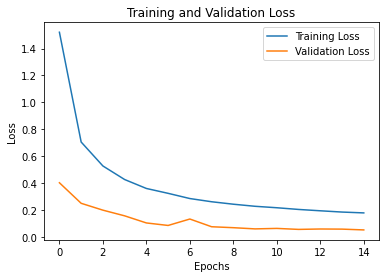

In [116]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

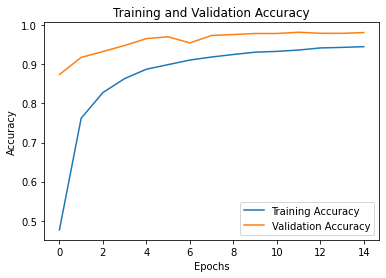

In [117]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [118]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 9ms/step


In [119]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.96      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

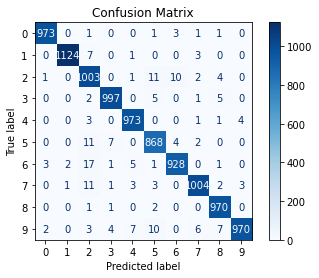

In [120]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of 0.001 Learning Rate')
plt.show()

### learning rate of 0.0001

In [121]:
# model compile with learning rate 0.0001

model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1592 - accuracy: 0.9511 - val_loss: 0.0506 - val_accuracy: 0.9828
Epoch 2/15
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1557 - accuracy: 0.9530 - val_loss: 0.0494 - val_accuracy: 0.9833
Epoch 3/15
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1552 - accuracy: 0.9536 - val_loss: 0.0496 - val_accuracy: 0.9831
Epoch 4/15
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1552 - accuracy: 0.9528 - val_loss: 0.0483 - val_accuracy: 0.9836
Epoch 5/15
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1521 - accuracy: 0.9541 - val_loss: 0.0484 - val_accuracy: 0.9830
Epoch 6/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1494 - accuracy: 0.9549 - val_loss: 0.0504 - val_accuracy: 0.9833
Epoch 7/15
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1506 - accuracy: 0.9546 - val_loss: 0.0473 -

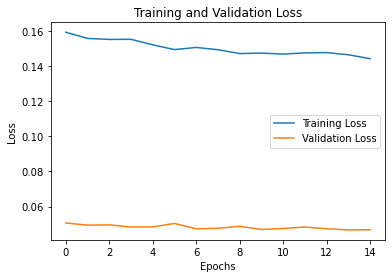

In [122]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

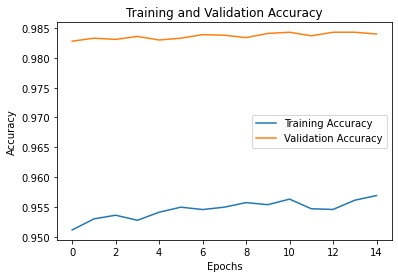

In [123]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [124]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 10ms/step


In [125]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.95      0.97      0.96      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

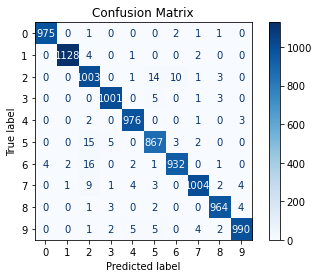

In [126]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of 0.0001 Learning Rate')
plt.show()

### learning rate of 0.1

In [127]:
# model compile with learning rate 0.1

model.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 53s 28ms/step - loss: 3.8069 - accuracy: 0.1060 - val_loss: 2.3040 - val_accuracy: 0.0958
Epoch 2/15
1875/1875 [==============================] - 59s 32ms/step - loss: 2.3084 - accuracy: 0.1041 - val_loss: 2.3078 - val_accuracy: 0.1135
Epoch 3/15
1875/1875 [==============================] - 58s 31ms/step - loss: 2.3086 - accuracy: 0.1039 - val_loss: 2.3057 - val_accuracy: 0.1135
Epoch 4/15
1875/1875 [==============================] - 63s 34ms/step - loss: 2.3080 - accuracy: 0.1040 - val_loss: 2.3056 - val_accuracy: 0.1028
Epoch 5/15
1875/1875 [==============================] - 53s 28ms/step - loss: 2.3085 - accuracy: 0.1051 - val_loss: 2.3049 - val_accuracy: 0.1135
Epoch 6/15
1875/1875 [==============================] - 59s 31ms/step - loss: 2.3074 - accuracy: 0.1045 - val_loss: 2.3073 - val_accuracy: 0.1032
Epoch 7/15
1875/1875 [==============================] - 66s 35ms/step - loss: 2.3080 - accuracy: 0.1045 - val_loss: 2.3059 -

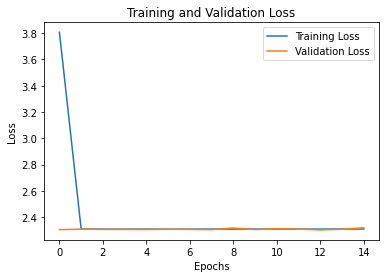

In [128]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

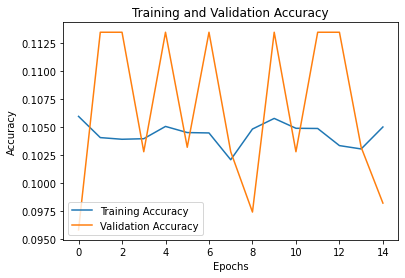

In [129]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [130]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 8ms/step


In [131]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.10      1.00      0.18       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 2000x3000 with 0 Axes>

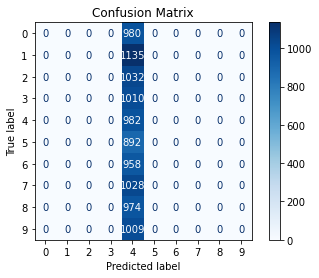

In [132]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of 0.1 Learning Rate')
plt.show()

### 0.05 learning rate

In [133]:
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 2, 2, 128)      

In [134]:
# model compile with learning rate 0.05

model.compile(optimizer=SGD(learning_rate=0.05, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 55s 29ms/step - loss: 0.8497 - accuracy: 0.7324 - val_loss: 0.2881 - val_accuracy: 0.9293
Epoch 2/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.7569 - accuracy: 0.7891 - val_loss: 0.3026 - val_accuracy: 0.9217
Epoch 3/15
1875/1875 [==============================] - 55s 30ms/step - loss: 1.0883 - accuracy: 0.6882 - val_loss: 1.0807 - val_accuracy: 0.7182
Epoch 4/15
1875/1875 [==============================] - 69s 37ms/step - loss: 1.3877 - accuracy: 0.5800 - val_loss: 0.6374 - val_accuracy: 0.8133
Epoch 5/15
1875/1875 [==============================] - 57s 30ms/step - loss: 2.0585 - accuracy: 0.2341 - val_loss: 2.3087 - val_accuracy: 0.0980
Epoch 6/15
1875/1875 [==============================] - 69s 37ms/step - loss: 2.3044 - accuracy: 0.1091 - val_loss: 2.3036 - val_accuracy: 0.1135
Epoch 7/15
1875/1875 [==============================] - 52s 28ms/step - loss: 2.3047 - accuracy: 0.1059 - val_loss: 2.3072 -

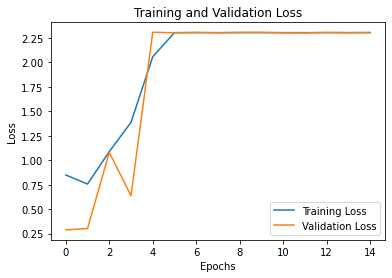

In [135]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

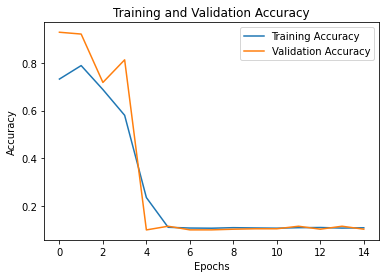

In [136]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [137]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 7ms/step


In [138]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.10      1.00      0.18      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 2000x3000 with 0 Axes>

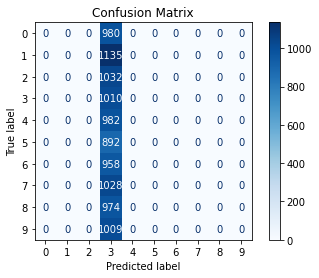

In [139]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of 0.05 Learning rate')
plt.show()

### Learning rate 0.012

In [140]:
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 2, 2, 128)      

In [141]:
# model compile with learning rate 0.012

model.compile(optimizer=SGD(learning_rate=0.012, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 71s 38ms/step - loss: 0.6820 - accuracy: 0.7736 - val_loss: 0.1183 - val_accuracy: 0.9605
Epoch 2/15
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2684 - accuracy: 0.9191 - val_loss: 0.0821 - val_accuracy: 0.9720
Epoch 3/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2005 - accuracy: 0.9394 - val_loss: 0.0726 - val_accuracy: 0.9788
Epoch 4/15
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1700 - accuracy: 0.9492 - val_loss: 0.0555 - val_accuracy: 0.9817
Epoch 5/15
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1522 - accuracy: 0.9551 - val_loss: 0.0516 - val_accuracy: 0.9849
Epoch 6/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1385 - accuracy: 0.9596 - val_loss: 0.0515 - val_accuracy: 0.9838
Epoch 7/15
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1339 - accuracy: 0.9600 - val_loss: 0.0589 -

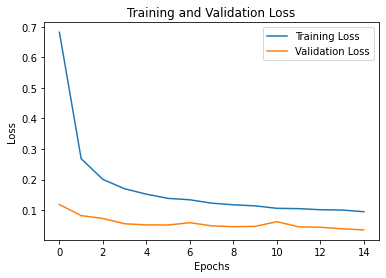

In [142]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

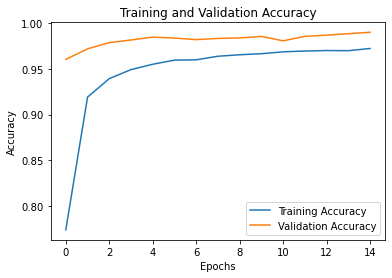

In [143]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [144]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 4s 14ms/step


In [145]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.97      0.99      0.98      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

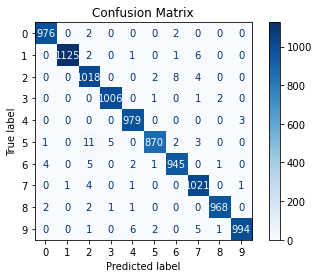

In [146]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of 0.012 Learning Rate')
plt.show()

### Try learning rate 0.005

In [147]:
# Creating sequential

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))# 2 represent output layer neurons 

# print the summary of the model constructed
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 2, 2, 128)      

In [148]:
# model compile with learning rate 0.005

model.compile(optimizer=SGD(learning_rate=0.005, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 95s 49ms/step - loss: 0.8792 - accuracy: 0.7011 - val_loss: 0.1425 - val_accuracy: 0.9551
Epoch 2/15
1875/1875 [==============================] - 86s 46ms/step - loss: 0.3499 - accuracy: 0.8931 - val_loss: 0.0844 - val_accuracy: 0.9703
Epoch 3/15
1875/1875 [==============================] - 67s 35ms/step - loss: 0.2475 - accuracy: 0.9246 - val_loss: 0.0617 - val_accuracy: 0.9795
Epoch 4/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2032 - accuracy: 0.9394 - val_loss: 0.0705 - val_accuracy: 0.9766
Epoch 5/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1792 - accuracy: 0.9456 - val_loss: 0.0571 - val_accuracy: 0.9808
Epoch 6/15
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1577 - accuracy: 0.9528 - val_loss: 0.0531 - val_accuracy: 0.9830
Epoch 7/15
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1480 - accuracy: 0.9560 - val_loss: 0.0476 -

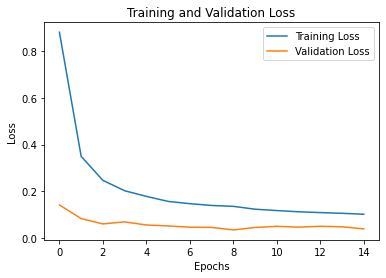

In [149]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

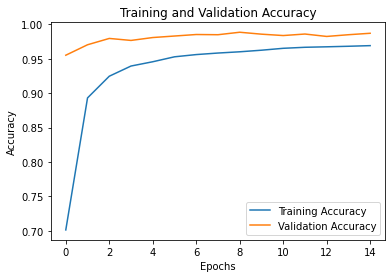

In [150]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [151]:
# Predict the classes of the test set
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 5s 14ms/step


In [152]:
from sklearn.metrics import classification_report
# Print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.97      0.97      0.97      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

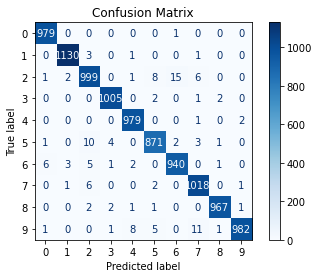

In [153]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(dpi=200, figsize=(10,15))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of 0.005 Learning Rate ')
plt.show()